<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1. Energia** 

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [2]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [3]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipykernel_10497/3697779589.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [4]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [5]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


In [6]:
# Checando se a coluna "referencia" foi formatada em "datetime"
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   referencia   204 non-null    datetime64[ns]
 1   residencial  204 non-null    int64         
 2   industrial   204 non-null    int64         
 3   comercial    204 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.5 KB


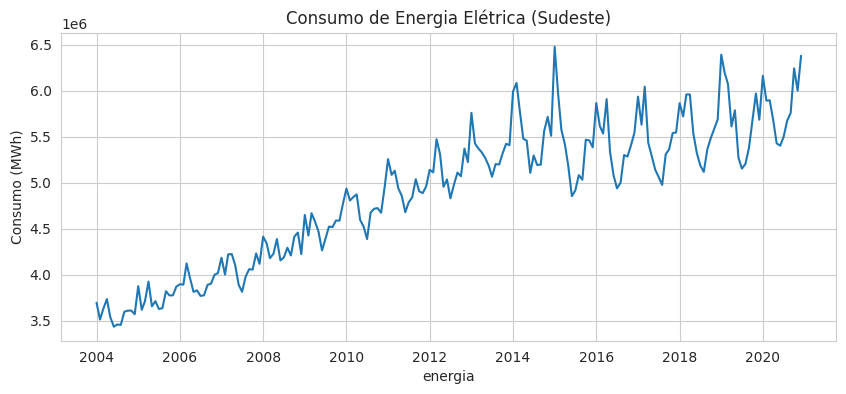

In [7]:
# Verificando o intervalo de tempo 
with sns.axes_style("whitegrid"):
    grafico = sns.lineplot(data=energia, x="referencia", y="residencial", palette="pastel")
    grafico.set(title='Consumo de Energia Elétrica (Sudeste)', ylabel='Consumo (MWh)', xlabel="energia")
    grafico.figure.set_size_inches(10, 4)

Responda:

 - Qual é a granularidade da base de dados: **Analisando a base de dados acima, podemos observar que a granularidade dos dados é de mês em mês, pois filtrando por exemplo um ano específico, temos uma amostra de todos os meses.**

 
 - Qual é o intervalo de tempo (min/max): **Começa de janeiro até dezembro de todos os anos, inicializando no ano de 2004 até 2020.**

### **1.2. Temperatura** 

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [8]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [9]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)

/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipykernel_10497/1081947969.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0], infer_datetime_format=True)


In [10]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [11]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


In [12]:
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   referencia     901 non-null    datetime64[ns]
 1   temp-media-sp  901 non-null    int64         
 2   temp-media-rj  814 non-null    float64       
 3   temp-media-mg  894 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 28.3 KB


In [13]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [14]:
temperatura.set_index(keys=["referencia"])

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0
...,...,...,...
2020-12-27,20,24.0,23.0
2020-12-28,21,25.0,23.0
2020-12-29,22,27.0,23.0


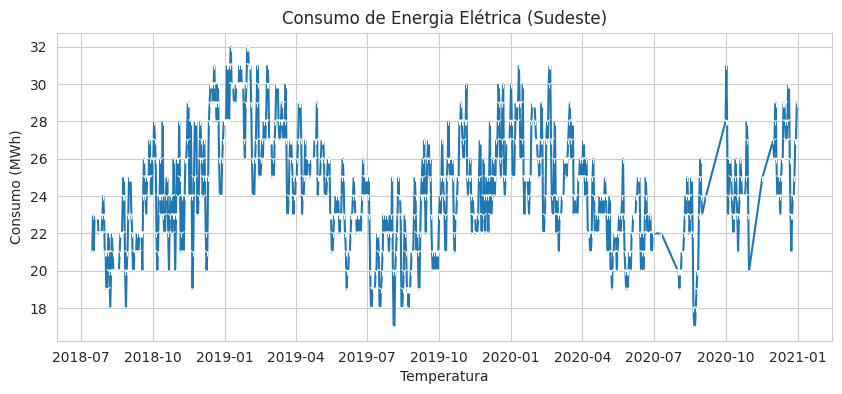

In [15]:
# Checando o período inicial até o período final (07-2018 até 01-2020)
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media-rj', marker="1", palette="pastel")
  grafico.set(title='Consumo de Energia Elétrica (Sudeste)', ylabel='Consumo (MWh)', xlabel='Temperatura')
  grafico.figure.set_size_inches(10, 4)

Responda:

 - Qual é a granularidade da base de dados: **A granularidade do conjunto de dados de temperatura é diário.**
 - Qual é o intervalo de tempo (min/max): **Inicia-se no dia 15 de Julho de 2018 até o dia 31 de Dezembro de 2021.**

## 2\. Processamento 

### **2.1. Energia** 

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [16]:
energia.set_index(keys=["referencia"])

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084
...,...,...,...
2020-08-01,5671487,7697947,3198269
2020-09-01,5756787,7723167,3431649
2020-10-01,6241392,8042503,3890202


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [17]:
data_19_20 = energia[energia["referencia"].between("2019-01-01", "2020-12-01")]
data_19_20 = data_19_20.set_index("referencia")
data_19_20.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [18]:
# conferindo as 24 linhas (24 meses)
data_19_20.shape

(24, 3)

In [19]:
# analisando os indices
data_19_20.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='referencia', freq=None)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura** 

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [20]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [21]:
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   referencia     901 non-null    datetime64[ns]
 1   temp-media-sp  901 non-null    int64         
 2   temp-media-rj  814 non-null    float64       
 3   temp-media-mg  894 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 28.3 KB


In [22]:
temperatura.set_index(keys=["referencia"])

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0
...,...,...,...
2020-12-27,20,24.0,23.0
2020-12-28,21,25.0,23.0
2020-12-29,22,27.0,23.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [23]:
temp19_20 = temperatura[temperatura["referencia"].between("2019-01-01", "2020-12-31")]
temp19_20 = temp19_20.set_index(["referencia"])
temp19_20.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-01-02,25,28.0,24.0
2019-01-03,26,31.0,24.0
2019-01-04,23,31.0,22.0
2019-01-05,21,28.0,23.0


In [24]:
# 731 linhas pelo fato das datas serem diárias (365 dias em ambos os anos)
temp19_20.shape

(731, 3)

 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [25]:
# após a filtragem dos anos entre 2019 e 2020 não temos valores nulos
temp19_20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  731 non-null    int64  
 1   temp-media-rj  644 non-null    float64
 2   temp-media-mg  724 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.8 KB


In [26]:
temp19_20.isnull().sum()

temp-media-sp     0
temp-media-rj    87
temp-media-mg     7
dtype: int64

In [27]:
temp19_20 = temp19_20.dropna()

In [28]:
temp19_20.isnull().sum()

temp-media-sp    0
temp-media-rj    0
temp-media-mg    0
dtype: int64

In [29]:
temp19_20.shape

(643, 3)

 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste). 

In [30]:
temp19_20["temp-media"] = temp19_20[["temp-media-sp", "temp-media-rj", "temp-media-mg"]].mean(axis=1)
temp19_20.head(32)

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.666667
2019-01-02,25,28.0,24.0,25.666667
2019-01-03,26,31.0,24.0,27.000000
2019-01-04,23,31.0,22.0,25.333333
2019-01-05,21,28.0,23.0,24.000000
2019-01-06,22,28.0,25.0,25.000000
2019-01-07,25,31.0,25.0,27.000000
2019-01-08,26,32.0,24.0,27.333333
2019-01-09,24,30.0,23.0,25.666667


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação. 

In [31]:
# utilizando a funcao do pandas resample para os meses, conforme sao os dados da energia eletrica
temp19_20_resampled = temp19_20.resample(rule="m").mean()

/var/folders/5j/1xl9_4g17_s_rk9dswvp3d7m0000gn/T/ipykernel_10497/2284645644.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp19_20_resampled = temp19_20.resample(rule="m").mean()


In [32]:
# inicializando no comeco de cada mes, entao inseri o M maiusculo
temp19_20_resampled.index = temp19_20_resampled.index.to_period('M').to_timestamp()
temp19_20_resampled.head(15)

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,24.000000,29.774194,24.483871,26.086022
2019-02-01,21.928571,27.464286,23.571429,24.321429
2019-03-01,21.258065,26.645161,23.032258,23.645161
2019-04-01,20.833333,26.066667,22.600000,23.166667
2019-05-01,19.161290,24.193548,21.225806,21.526882
2019-06-01,17.600000,22.800000,19.333333,19.911111
2019-07-01,15.580645,21.096774,18.193548,18.290323
2019-08-01,16.032258,20.935484,20.129032,19.032258
2019-09-01,18.333333,22.766667,23.100000,21.400000


In [33]:
temp19_20_resampled.shape

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação 

### **3.1. Consumo residencial** 

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

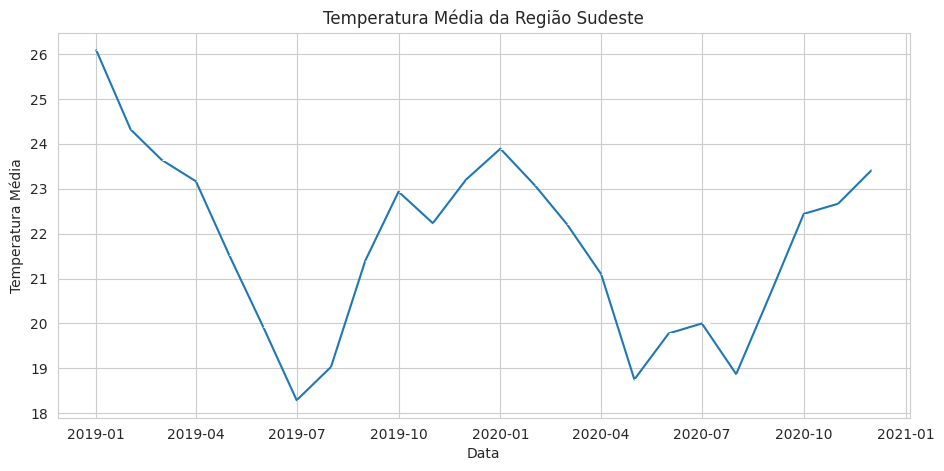

In [34]:
with sns.axes_style("whitegrid"):
    grafico = sns.lineplot(data=temp19_20_resampled, x="referencia", y="temp-media", marker=1, palette="pastel")
    grafico.set(title="Temperatura Média da Região Sudeste", ylabel="Temperatura Média", xlabel="Data")
    grafico.figure.set_size_inches(11, 5)

In [35]:
# duvida: qual parametro no seaborn que possa aparecer a temperatura media de cada mês? 
# pesquisei mas nao consegui

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

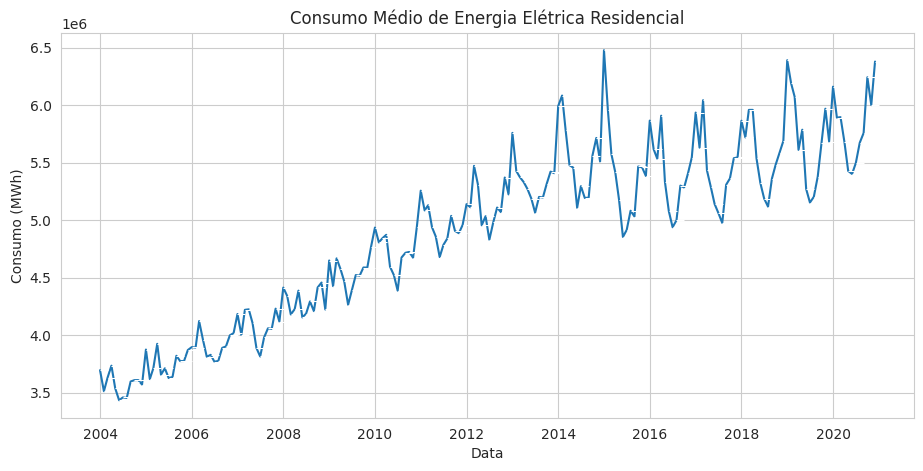

In [36]:
with sns.axes_style("whitegrid"):
    grafico = sns.lineplot(data=energia, x="referencia", y="residencial", marker=1, palette="pastel")
    grafico.set(title="Consumo Médio de Energia Elétrica Residencial", ylabel="Consumo (MWh)", xlabel="Data")
    grafico.figure.set_size_inches(11, 5)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [37]:
coef_pearson = np.corrcoef(data_19_20["residencial"], temp19_20_resampled["temp-media"])
print(coef_pearson, [0, 1])

[[1.         0.82427182]
 [0.82427182 1.        ]] [0, 1]


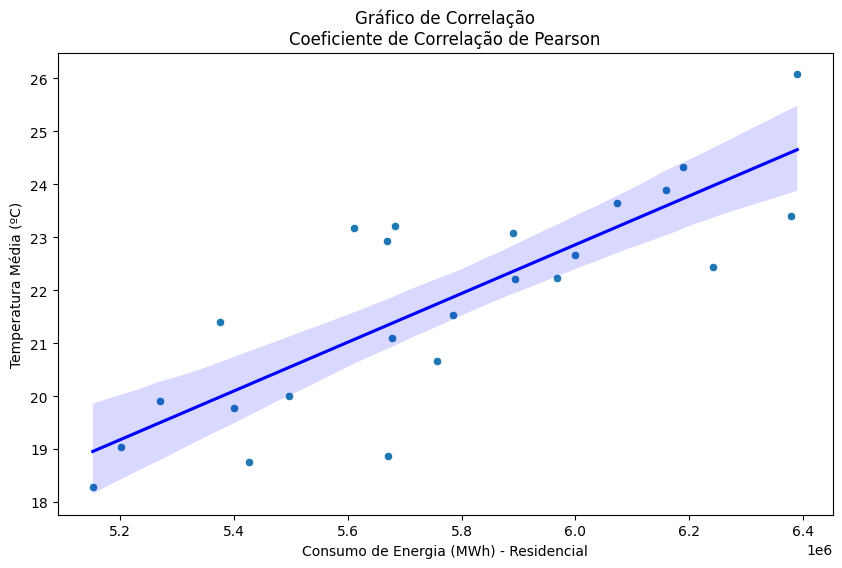

In [ ]:
# criando o gráfico de dispersão com seaborn
plt.figure(figsize=(10, 6))

# usando scatterplot para criar o gráfico de dispersão
sns.scatterplot(x=data_19_20["residencial"], y=temp19_20_resampled["temp-media"])

# usando regplot para adicionar a linha de regressão linear
sns.regplot(x=data_19_20["residencial"], y=temp19_20_resampled["temp-media"], scatter=False, color="blue")

# adicionando o coeficiente de correlação ao gráfico
#plt.title(f"Gráfico de Correlação\nCoeficiente de Correlação de Pearson: {coef_pearson:.8f}")
plt.title(f"Gráfico de Correlação\nCoeficiente de Correlação de Pearson") 
plt.xlabel("Consumo de Energia (MWh) - Residencial")
plt.ylabel("Temperatura Média (ºC)")

# mostrando o gráfico
plt.show()

 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?



**Resposta:** 

Podemos analisar que o coeficiente de correlação é de 0.82427182, o que significa que tem uma correlação positiva entre as duas variáveis: "residencial" e "temp-media". Quanto mais próximo do número 1, significa que tem correlação. Ou seja, nesse caso tanto o eixo x (Residencial), quanto o eixo y (Temperatura) é um bom atributo para prever o consumo de energia elétrica residencial.

Acredito que não tenha uma forte correlação, pelo fato de ter alguns pontos dispersos da linha, como podemos ver no gráfico.

### **3.2. Consumo comercial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

In [ ]:
# analisando os dados
energia.head()

# indexando referencia
energia.set_index(keys=["referencia"])

# filtrando dados 2019 e 2020
comercial_19_20 = energia[energia["referencia"].between("2019-01-01", "2020-12-01")]
comercial_19_20 = comercial_19_20.set_index("referencia")
comercial_19_20.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [ ]:
# conferindo o shape
comercial_19_20.shape

(24, 3)

In [ ]:
# analisando os indices
comercial_19_20.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='referencia', freq=None)

In [ ]:
# analisando detalhadamente o dataset
comercial_19_20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2019-01-01 to 2020-12-01
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   residencial  24 non-null     int64
 1   industrial   24 non-null     int64
 2   comercial    24 non-null     int64
dtypes: int64(3)
memory usage: 768.0 bytes


In [ ]:
# verificando dados ausentes
comercial_19_20.isnull().sum()

residencial    0
industrial     0
comercial      0
dtype: int64

In [ ]:
# metodo corrcoef
coef_pearson_comercial = np.corrcoef(comercial_19_20["comercial"], temp19_20_resampled["temp-media"])
print(coef_pearson_comercial, [0, 1])

[[1.         0.82350289]
 [0.82350289 1.        ]] [0, 1]


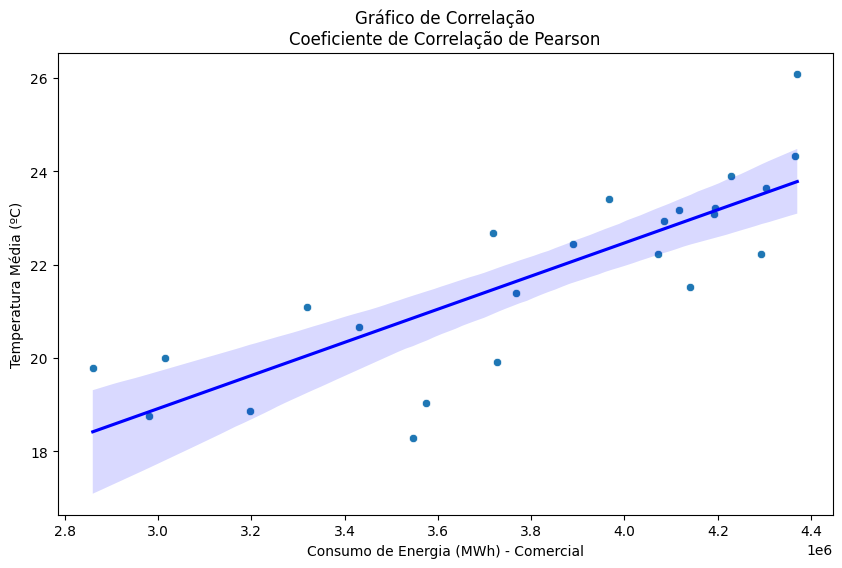

In [ ]:
# criando o gráfico de dispersão com seaborn
plt.figure(figsize=(10, 6))

# usando scatterplot para criar o gráfico de dispersão
sns.scatterplot(x=data_19_20["comercial"], y=temp19_20_resampled["temp-media"])

# usando regplot para adicionar a linha de regressão linear
sns.regplot(x=data_19_20["comercial"], y=temp19_20_resampled["temp-media"], scatter=False, color="blue")

# adicionando o coeficiente de correlação ao gráfico
plt.title(f"Gráfico de Correlação\nCoeficiente de Correlação de Pearson") 
plt.xlabel("Consumo de Energia (MWh) - Comercial")
plt.ylabel("Temperatura Média (ºC)")

# mostrando o gráfico
plt.show()

Podemos analisar que o consumo de energia nos comércios existe uma relação positiva forte. De acordo com o aumento da temperatura, o consumo também aumenta, existindo essa correlação.

É possível que existe diversos fatores para que isso ocorra. Um dos principais exemplos seriam o aumento do consumo do ar-condicionado, iluminação, eletrodomésticos, acredito que seja semelhante ao residencial.

### **3.3. Consumo industrial** 

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

In [ ]:
# analisando os dados
energia.head()

# indexando referencia
energia.set_index(keys=["referencia"])

# filtrando dados 2019 e 2020
industrial_19_20 = energia[energia["referencia"].between("2019-01-01", "2020-12-01")]
industrial_19_20 = industrial_19_20.set_index("referencia")
industrial_19_20.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [ ]:
industrial_19_20.shape

(24, 3)

In [ ]:
industrial_19_20.index.min(), industrial_19_20.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))

In [ ]:
industrial_19_20.isnull().sum()

residencial    0
industrial     0
comercial      0
dtype: int64

In [ ]:
# metodo corrcoef
coef_pearson_industrial = np.corrcoef(industrial_19_20["industrial"], temp19_20_resampled["temp-media"])
print(coef_pearson_industrial, [0, 1])

[[1.         0.28732297]
 [0.28732297 1.        ]] [0, 1]


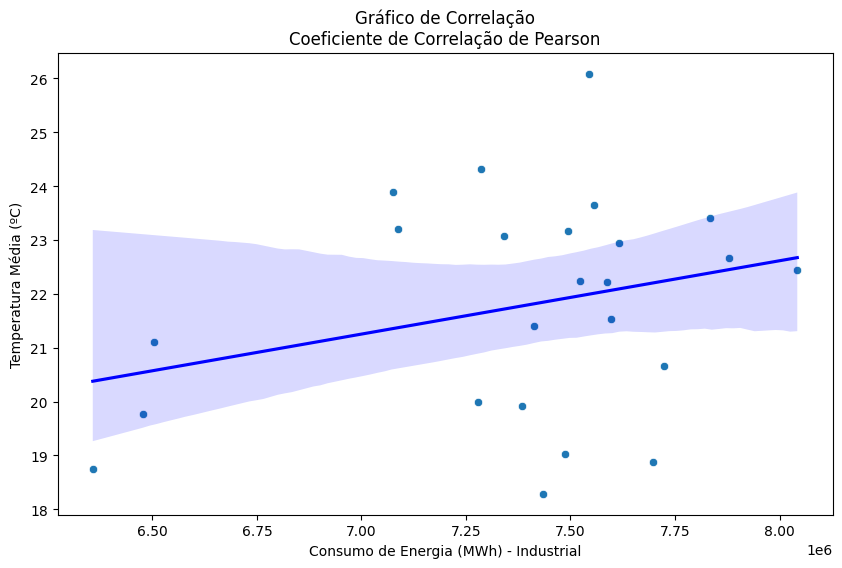

In [ ]:
# criando o gráfico de dispersão com seaborn
plt.figure(figsize=(10, 6))

# usando scatterplot para criar o gráfico de dispersão
sns.scatterplot(x=industrial_19_20["industrial"], y=temp19_20_resampled["temp-media"])

# usando regplot para adicionar a linha de regressão linear
sns.regplot(x=industrial_19_20["industrial"], y=temp19_20_resampled["temp-media"], scatter=False, color="blue")

# adicionando o coeficiente de correlação ao gráfico
plt.title(f"Gráfico de Correlação\nCoeficiente de Correlação de Pearson") 
plt.xlabel("Consumo de Energia (MWh) - Industrial")
plt.ylabel("Temperatura Média (ºC)")

# mostrando o gráfico
plt.show()

Analisando agora o consumo de energia industrial, notamos que a correlação com a temperatura é fraca. Os pontos no gráfico podemos observar que estão bem distantes um do outro, fazendo com que das 3 variáveis: Residencial, Industrial e Comercial. A categoria Industrial é a única que mostrou uma correlação fraca comparado com as outras.

---